In [1]:
import sys
%pip install numpy pandas tensorflow scikit-learn nltk matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [3]:
path = r"..\News_Category_Dataset_v3.json"
path_fix = r"..\News_Category_Final.csv"

df = pd.read_json(path, lines=True)
df.head()

df_final = pd.read_csv(path_fix)
df_final.head()

print(df_final[['headline', 'category']])

                                                headline  category
0      John Boehner Begins New Chapter At High-Powere...         6
1      Tuesday's Morning Email: Sanders Supporters Ma...         6
2                         The 'End' Is Never Really That         0
3      Fit Links: The While-You-Watch Olympics Workou...         0
4      The Trump Administration Is Suing California A...         6
...                                                  ...       ...
63295  Disappointed North Korean Says He Is 'Not A He...         7
63296  It's Among the World's Hardest Sled Runs. Why ...         7
63297  Colin Kaepernick On Death Threats: Killing Me ...         7
63298  Drake's Super Bowl Ad Makes You Wanna Call Som...         7
63299  Hockey Legend Having Trouble Speaking After St...         7

[63300 rows x 2 columns]


In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemm = WordNetLemmatizer()

def text_preprocess(text):
    text = text.lower()                            # 1. lowercase
    text = re.sub(r'http\S+', '', text)            # 2. remove url
    text = re.sub(r'[^a-z\s]', '', text)           # 3. remove punctuation & numbers
    tokens = text.split()                          # 4. tokenization
    tokens = [w for w in tokens if w not in stop_words]  # 5. remove stopwords
    tokens = [lemm.lemmatize(w) for w in tokens]   # 6. lemmatization
    return " ".join(tokens)

def csv_preprocess(df):
    df = df.drop_duplicates(subset='headline', keep='first')
    df = df.dropna()
    df = df.reset_index(drop=True)
        
    return df

def format_date(date_str):
    if not isinstance(date_str, str) or not date_str.strip():
        return ""
    try:
        dt = pd.to_datetime(date_str, errors='coerce')
        if pd.isna(dt):
            return ""
        return dt.strftime('%d/%m/%Y')
    except:
        return ""

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Risya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Risya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
pd.set_option('display.max_colwidth', None)
df['cleaned_headline'] = df['headline'].apply(text_preprocess)
df = csv_preprocess(df)
df[['headline', 'cleaned_headline', 'category']].head()

,headline,cleaned_headline,category
0,Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters,million american roll sleeve omicrontargeted covid booster,U.S. NEWS
1,"American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video",american airline flyer charged banned life punching flight attendant video,U.S. NEWS
2,23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23),funniest tweet cat dog week sept,COMEDY
3,The Funniest Tweets From Parents This Week (Sept. 17-23),funniest tweet parent week sept,PARENTING
4,Woman Who Called Cops On Black Bird-Watcher Loses Lawsuit Against Ex-Employer,woman called cop black birdwatcher loses lawsuit exemployer,U.S. NEWS


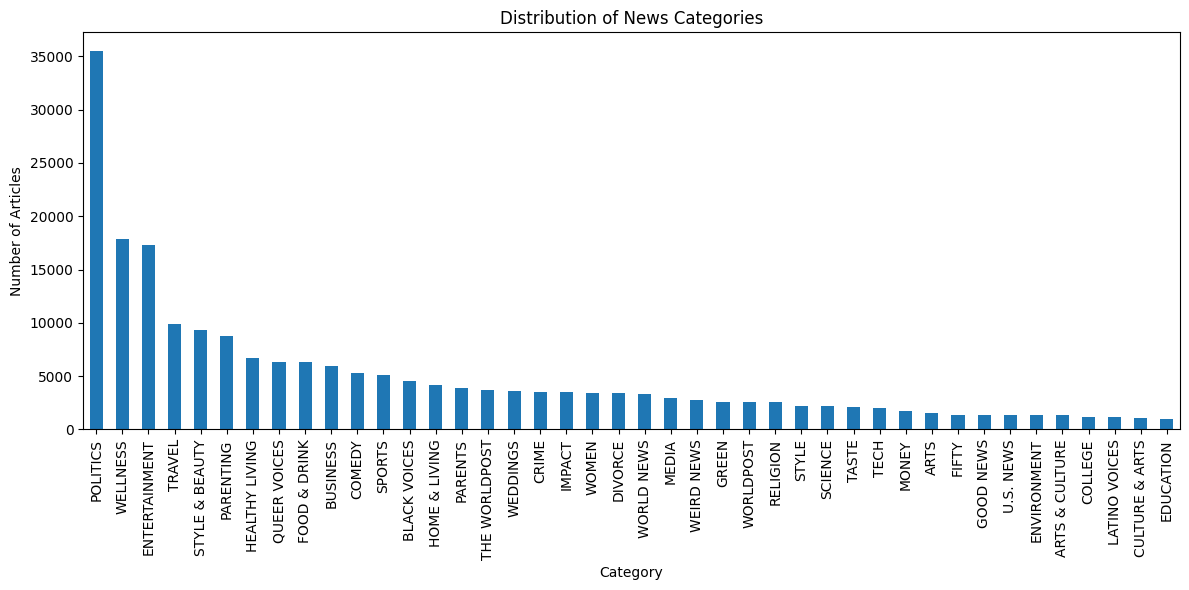

In [6]:
import matplotlib.pyplot as plt
# Count unique categories
category_counts = df['category'].value_counts()

# Plot the category distribution
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar')
plt.title('Distribution of News Categories')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

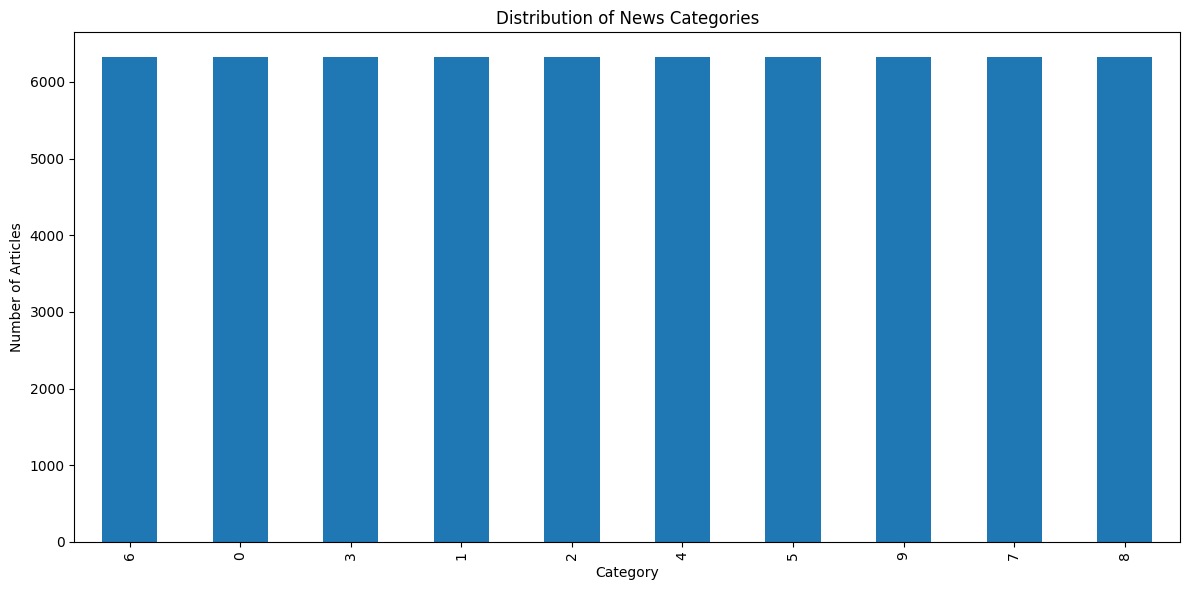

In [7]:
import matplotlib.pyplot as plt
# Count unique categories
category_counts = df_final['category'].value_counts()

# Plot the category distribution
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar')
plt.title('Distribution of News Categories')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [8]:
print("Business", df[df['category'] == 'BUSINESS'].count())
print("Sports", df[df['category'] == 'SPORTS'].count())
print("Tech", df[df['category'] == 'TECH'].count())


Business link                 5976
headline             5976
category             5976
short_description    5976
authors              5976
date                 5976
cleaned_headline     5976
dtype: int64
Sports link                 5075
headline             5075
category             5075
short_description    5075
authors              5075
date                 5075
cleaned_headline     5075
dtype: int64
Tech link                 2047
headline             2047
category             2047
short_description    2047
authors              2047
date                 2047
cleaned_headline     2047
dtype: int64


In [9]:
# Load Original & Additional Datasets
import json
import pandas as pd

try:
    df_add = pd.read_csv('../Datasets/News_Dataset.csv')
    add_news = df_add.to_dict('records')
    
    nytimes_df = pd.read_json('../Datasets/nytimes_dataset.json')
    nytimes_data = nytimes_df.to_dict('records')
    
    news_df = pd.read_json('../News_Category_Dataset_v3.json', lines=True)
    news_data = news_df.to_dict('records')

    huff_df = pd.read_csv('../Datasets/huffpost_news_data.csv')
    huff_data = huff_df.to_dict('records')
        
    try:
        final_df = pd.read_csv('../News_Category_Final.csv')
    except FileNotFoundError:
        final_df = pd.DataFrame()
        
except Exception as e:
    print(f"Error loading files: {e}")
    add_news = []
    nytimes_data = []
    news_data = []
    huff_data = []

In [10]:
# Insert according to final dataset params and check categories
add_news_rows = []
for item in add_news:
    add_news_rows.append({
        'link': item.get('url', ''),              
        'headline': item.get('title', ''),        
        'category': item.get('category', ''),     
        'short_description': item.get('description', ''), 
        'authors': item.get('author', ''),        
        'date': item.get('publishedAt', ''),      
        'cleaned_headline': text_preprocess(str(item.get('title', ''))) 
    })

temp_df1 = pd.DataFrame(add_news_rows)
print(temp_df1['category'].unique())

nytimes_rows = []
for item in nytimes_data:
    nytimes_rows.append({
        'link': item.get('article_url', ''),
        'headline': item.get('headline', ''),
        'category': item.get('section', ''),
        'short_description': item.get('abstract', ''),
        'authors': '',
        'date': '',
        'cleaned_headline': text_preprocess(str(item.get('headline', '')))
    })

temp_df2 = pd.DataFrame(nytimes_rows)
print()
print(temp_df2['category'].unique())

news_rows = []
for item in news_data:
    news_rows.append({
        'link': item.get('link', ''),
        'headline': item.get('headline', ''),
        'category': item.get('category', ''),
        'short_description': item.get('short_description', ''),
        'authors': item.get('authors', ''),
        'date': item.get('date', ''),
        'cleaned_headline': text_preprocess(str(item.get('headline', '')))
    })
    
temp_df3 = pd.DataFrame(news_rows)
print()
print(temp_df3['category'].unique())

huff_rows = []
for item in huff_data:
    huff_rows.append({
        'link': item.get('url', ''),
        'headline': item.get('headline', ''),
        'category': item.get('article_section', ''),
        'short_description': item.get('short_description', ''),
        'authors': item.get('author', ''),
        'date': '',
        'cleaned_headline': text_preprocess(str(item.get('headline', '')))
    })
temp_df4 = pd.DataFrame(huff_rows)
print()
print(temp_df4['category'].unique())

['technology' 'sports' 'finance' 'politics' 'education' 'health'
 'entertainment']

['Health' 'Science' 'Television' 'Travel' 'Movies' 'Dance' 'Real Estate'
 'Economy' 'Sports' 'Theater' 'Opinion' 'Music' 'Books' 'Art & Design'
 'Style' 'Media' 'Food' 'Well' 'Fashion' 'Technology' 'Your Money'
 'Education' 'Automobiles' 'Global Business']

['U.S. NEWS' 'COMEDY' 'PARENTING' 'WORLD NEWS' 'CULTURE & ARTS' 'TECH'
 'SPORTS' 'ENTERTAINMENT' 'POLITICS' 'WEIRD NEWS' 'ENVIRONMENT'
 'EDUCATION' 'CRIME' 'SCIENCE' 'WELLNESS' 'BUSINESS' 'STYLE & BEAUTY'
 'FOOD & DRINK' 'MEDIA' 'QUEER VOICES' 'HOME & LIVING' 'WOMEN'
 'BLACK VOICES' 'TRAVEL' 'MONEY' 'RELIGION' 'LATINO VOICES' 'IMPACT'
 'WEDDINGS' 'COLLEGE' 'PARENTS' 'ARTS & CULTURE' 'STYLE' 'GREEN' 'TASTE'
 'HEALTHY LIVING' 'THE WORLDPOST' 'GOOD NEWS' 'WORLDPOST' 'FIFTY' 'ARTS'
 'DIVORCE']

['Black Voices' 'Travel' 'Post 50' 'Culture & Arts' 'Entertainment'
 'Politics' 'Style & Beauty' 'Wellness' 'Parenting' 'Weddings' 'Comedy'
 'Religion' 'Food & Dr

In [11]:
# Standardize category
raw_to_std_map = {
    # 7: SPORTS
    'SPORTS': 'SPORTS', 'sports': 'SPORTS', 'Sports': 'SPORTS',
    
    # 8: TECHNOLOGY (Combining Tech & Science)
    'TECHNOLOGY': 'TECHNOLOGY', 'technology': 'TECHNOLOGY', 'Technology': 'TECHNOLOGY',
    'TECH': 'TECHNOLOGY', 'Tech': 'TECHNOLOGY',
    'SCIENCE': 'TECHNOLOGY', 'Science': 'TECHNOLOGY', 'science': 'TECHNOLOGY',
    
    # 9: BUSINESS (Combining Business, Finance, Money, Economy)
    'BUSINESS': 'BUSINESS', 'Business': 'BUSINESS',
    'FINANCE': 'BUSINESS', 'finance': 'BUSINESS',
    'MONEY': 'BUSINESS', 'Money': 'BUSINESS', 'Your Money': 'BUSINESS',
    'ECONOMY': 'BUSINESS', 'Economy': 'BUSINESS', 'Global Business': 'BUSINESS',
    'Small Business': 'BUSINESS'
}

new_class_ids = {
    'SPORTS': 7,
    'TECHNOLOGY': 8,
    'BUSINESS': 9
}

print(f"Extracting New Classes: {list(new_class_ids.keys())}")

Extracting New Classes: ['SPORTS', 'TECHNOLOGY', 'BUSINESS']


In [12]:
new_class_rows = []

# Extract according to final dataset format
def process_source(source_list, key_headline, key_category, key_link, key_desc, key_authors, key_date):
    count = 0
    for item in source_list:
        raw_cat = str(item.get(key_category, '')).strip()
        
        if raw_cat in raw_to_std_map:
            std_name = raw_to_std_map[raw_cat]
            if std_name in new_class_ids:
                new_class_rows.append({
                    'link': str(item.get(key_link, '')),
                    'headline': str(item.get(key_headline, '')),
                    'category': new_class_ids[std_name],
                    'short_description': str(item.get(key_desc, '')),
                    'authors': str(item.get(key_authors, '')),
                    'date': format_date(str(item.get(key_date, ''))),
                })
                count += 1
    return count

if 'df_add' in locals() and not df_add.empty:
    c = process_source(df_add.to_dict('records'), 
                       'title', 'category', 'url', 'description', 'author', 'publishedAt')
    print(f"News_Dataset: Found {c} new rows")

if 'nytimes_df' in locals() and not nytimes_df.empty:
    c = process_source(nytimes_df.to_dict('records'), 
                       'headline', 'section', 'article_url', 'abstract', 'authors', 'date')
    print(f"NYTimes: Found {c} new rows")

if 'news_df' in locals() and not news_df.empty:
    c = process_source(news_df.to_dict('records'), 
                       'headline', 'category', 'link', 'short_description', 'authors', 'date')
    print(f"News_Category_v3: Found {c} new rows")

if 'huff_df' in locals() and not huff_df.empty:
    c = process_source(huff_df.to_dict('records'), 
                       'headline', 'article_section', 'url', 'short_description', 'author', 'date')
    print(f"HuffPost: Found {c} new rows")

print(f"Total potential new rows: {len(new_class_rows)}")

News_Dataset: Found 300 new rows
NYTimes: Found 13206 new rows
News_Category_v3: Found 17135 new rows
HuffPost: Found 575 new rows
Total potential new rows: 31216


In [13]:
if len(new_class_rows) > 0:
    df_new = pd.DataFrame(new_class_rows)

    # Tokenize text
    print("Tokenizing new data...")
    df_new['cleaned_headline'] = df_new['headline'].apply(text_preprocess)
    
    # Preprocess so data is valid
    print("Applying csv_preprocess...")
    df_new = csv_preprocess(df_new)
    # Remove rows where cleaned_headline might have become empty after preprocessing
    df_new = df_new[df_new['cleaned_headline'] != ""]

    # 4. Balance (Max 6330 per Class)
    df_new = df_new.sample(frac=1, random_state=42).reset_index(drop=True)
    df_new_balanced = df_new.groupby('category').head(6330)
    
    cols_to_keep = ['link', 'headline', 'category', 'short_description', 'authors', 'date', 'cleaned_headline']
    
    for col in cols_to_keep:
        if col not in df_new_balanced.columns:
            df_new_balanced[col] = ""
            
    df_new_final = df_new_balanced[cols_to_keep]

    # Append to Final Dataset
    existing_labels = final_df['category'].unique() if not final_df.empty else []
    for new_id in new_class_ids.values():
        if new_id in existing_labels:
            print(f"Warning: Class {new_id} exists. Overwriting...")
            final_df = final_df[final_df['category'] != new_id]
            
    updated_final_df = pd.concat([final_df, df_new_final], ignore_index=True)

    output_file = '../News_Category_Final.csv'
    updated_final_df.to_csv(output_file, index=False)

    print("-" * 30)
    print("Success. Added Classes 7, 8, 9 with all columns.")
    print("Updated Class Distribution:")
    print(updated_final_df['category'].value_counts().sort_index())
    print("-" * 30)
else:
    print("No matching data found.")

Tokenizing new data...
Applying csv_preprocess...
------------------------------
Success. Added Classes 7, 8, 9 with all columns.
Updated Class Distribution:
category
0    6330
1    6330
2    6330
3    6330
4    6330
5    6330
6    6330
7    6330
8    6330
9    6330
Name: count, dtype: int64
------------------------------


In [22]:
import json

# Update category mapping
new_entries = {
    7: 'SPORTS',
    8: 'TECHNOLOGY',
    9: 'BUSINESS'
}

# Load the existing mapping file
try:
    with open('../category_mapping.json', 'r') as f:
        category_map = json.load(f)
    print("Loaded existing mapping.")
except FileNotFoundError:
    print("Mapping file not found. Creating new one.")
    category_map = {}

#  with new classes
category_map.update(new_entries)

# Save the updated mapping back to the file
with open('../category_mapping.json', 'w') as f:
    json.dump(category_map, f)

print("Success! Updated category_mapping.json with new classes.")
print("Current Mapping:", json.dumps(category_map, indent=4))

Loaded existing mapping.
Success! Updated category_mapping.json with new classes.
Current Mapping: {
    "0": "WELLNESS",
    "1": "ENTERTAINMENT",
    "2": "TRAVEL",
    "3": "STYLE & BEAUTY",
    "4": "PARENTING",
    "5": "FOOD & DRINK",
    "6": "POLITICS",
    "7": "SPORTS",
    "8": "TECHNOLOGY",
    "9": "BUSINESS"
}


In [15]:
# Mengubah teks menjadi vector (Tokenizing)
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
df = updated_final_df
df['cleaned_headline'] = df['cleaned_headline'].astype(str)

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_headline'])

sequences = tokenizer.texts_to_sequences(df['cleaned_headline'])

MAX_LEN = 100

X_padded = pad_sequences(sequences, maxlen=MAX_LEN, padding='post')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_padded, df['category'], test_size=0.2, random_state=42)

c:\Users\Risya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


Average sequence length: 6.43
Median sequence length: 6.00
Max sequence length: 27
95th percentile: 10.00
99th percentile: 12.00


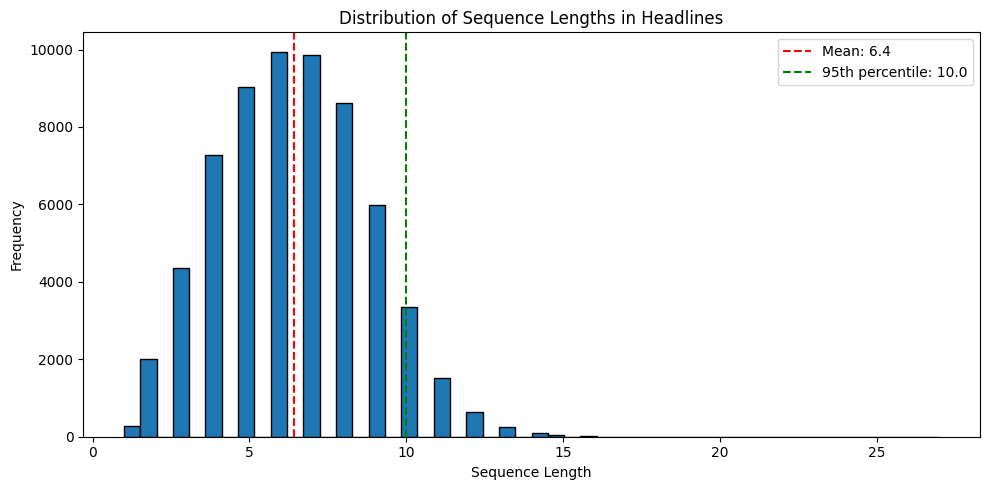

In [16]:
import matplotlib.pyplot as plt

sequence_lengths = [len(seq) for seq in sequences]
print(f"Average sequence length: {np.mean(sequence_lengths):.2f}")
print(f"Median sequence length: {np.median(sequence_lengths):.2f}")
print(f"Max sequence length: {max(sequence_lengths)}")
print(f"95th percentile: {np.percentile(sequence_lengths, 95):.2f}")
print(f"99th percentile: {np.percentile(sequence_lengths, 99):.2f}")

plt.figure(figsize=(10, 5))
plt.hist(sequence_lengths, bins=50, edgecolor='black')
plt.axvline(np.mean(sequence_lengths), color='r', linestyle='--', label=f'Mean: {np.mean(sequence_lengths):.1f}')
plt.axvline(np.percentile(sequence_lengths, 95), color='g', linestyle='--', label=f'95th percentile: {np.percentile(sequence_lengths, 95):.1f}')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Lengths in Headlines')
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
# IMPROVED: Re-tokenize with optimal MAX_LEN
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Use the same tokenizer but with better MAX_LEN
OPTIMAL_MAX_LEN = 15  # Covers 99% of headlines instead of wasteful 200

X_padded_improved = pad_sequences(sequences, maxlen=OPTIMAL_MAX_LEN, padding='post', truncating='post')

# Split the data
from sklearn.model_selection import train_test_split
X_train_improved, X_test_improved, y_train_improved, y_test_improved = train_test_split(
    X_padded_improved, df['category'], test_size=0.2, random_state=42, stratify=df['category']
)

print(f"Training set shape: {X_train_improved.shape}")
print(f"Test set shape: {X_test_improved.shape}")
print(f"Training set distribution:\n{pd.Series(y_train_improved).value_counts().sort_index()}")
print(f"\nTest set distribution:\n{pd.Series(y_test_improved).value_counts().sort_index()}")

Training set shape: (50640, 15)
Test set shape: (12660, 15)
Training set distribution:
category
0    5064
1    5064
2    5064
3    5064
4    5064
5    5064
6    5064
7    5064
8    5064
9    5064
Name: count, dtype: int64

Test set distribution:
category
0    1266
1    1266
2    1266
3    1266
4    1266
5    1266
6    1266
7    1266
8    1266
9    1266
Name: count, dtype: int64
